# 3.3 Realistic Pendula

<b>Realistic</b> (or nonlinear pendula) are pendula that do not use the small angle approximation. If there is  a periodic driving torque, then the pendula system is referred to as <b>chaotic</b>.

A chaotic pendulum can be described by the ODE:

\begin{align*}
    &\frac{d^2\theta}{dt^2} = -\omega_0^2 \sin\theta - \alpha \frac{d\theta}{dt} + f\cos\omega t \\
    &\omega_0 = \frac{mgl}{I}, \quad \alpha= \frac{\beta}{I}, \quad  f =\frac{\tau_0}{I}
\end{align*}

$\omega_0$ is the natural frequency, $\alpha$ arises from friction, and $f$ measures the strength of the torque.

<i>This is a difficult system to study with a computer because of the large parameter space $(\omega_0, \alpha, f, \omega)$ and the fact that system is hypersenstive to the parameters.</i>

In [2]:
# Import the rk4 method from a different file
from RungeKutta.rk4Algo import dsbRK4
from Integrals.integralAlgos import gaussQuad

from IPython import display
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

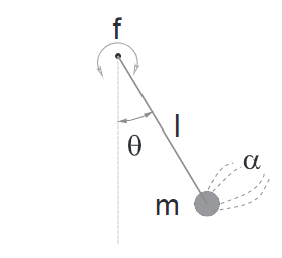

In [3]:
display.Image("./images/real_pen.png")

Let's consider an undriven realistic pendulum without friction:

\begin{equation*}
    \frac{d^2\theta}{dt^2} = -\omega_0^2 \sin\theta
\end{equation*}

To solve it numerically, let's make confirm the energy stays constant as time progresses. To do this, we want to compute the initial energy $E_0$ and the energy at a particular time $E(t)$.

\begin{align*}
    E_0 &= mgl(1-cos\theta_0) = 2mgl\sin^2(\theta_0/2) \\
    E(t) &= 2mgl\sin^2(\theta /2) + \frac{1}{2}ml^2\dot{\theta}^2
\end{align*} 

From this, notice that this pendulum <font color=red><i>starts from rest</i></font> with initial displacement $\theta_0$

In [4]:
def realPen(t,y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.This function models all three different types of friction from the text. The treatment of static friction requires a bit more effort than models previously worked on. Since static friction only occurs when v=0 and is an inequality that cancels out the forces causing the motion, we can't just set it to be a number. Instead, static friction is implemented by checking first to see if the system is moving (i.e. v=0) and then seeing if the spring force overcomes the static friction force. If spring is stronger than static friction, then we continue to move under the influence of kinetic and viscous friction. If it's weaker, then we stop the entire motion by setting the differential equations to 0.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...
    
    v[0] = y[1]
    v[1] = -(g/l)*np.sin(y[0])

    return v

In [5]:
def findEnergies(theta, omega):
    """
    Parameters
    -----------
    array: the array of thetas and omega

    Returns
    ------
    E : list
        Encapsulates the kinetic, potential, and total energy
    """

    n = theta.size

    K = np.empty(n)
    U = np.empty(n)
    E = np.empty(n)

    for i in range(0, n):
        K[i] = 0.5*m*(l**2)*((omega[i])**2)
        U[i] = 2*m*g*l*(np.sin(theta[i]/2))**2

        E[i] = (K[i]+U[i])

    return K, U, E
    

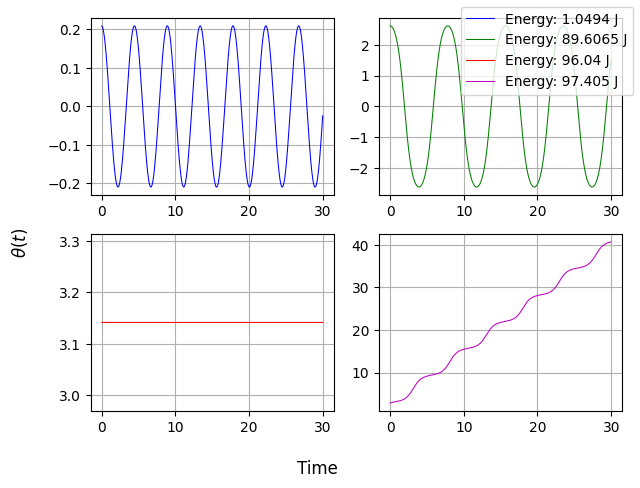

In [6]:
m, g, l, theta0 = 1, 9.8, (9.8)/2, 0

coords1, t1 = dsbRK4([np.pi/15, 0], realPen, 2, 3000, 1/100)
theta1, omega1 = coords1[0], coords1[1]
E1 = findEnergies(theta1, omega1)

coords2, t2 = dsbRK4([np.pi*(5/6), 0], realPen, 2, 3000, 1/100)
theta2, omega2 = coords2[0], coords2[1]
E2 = findEnergies(theta2, omega2)

coords3, t3 = dsbRK4([np.pi, 0], realPen, 2, 3000, 1/100)
theta3, omega3 = coords3[0], coords3[1]
E3 = findEnergies(theta3, omega3)

coords4, t4 = dsbRK4([(11/12)*np.pi, 0.5], realPen, 2, 3000, 1/100)
theta4, omega4 = coords4[0], coords4[1]
E4 = findEnergies(theta4, omega4)

kin, kaxs = plt.subplots(2, 2)

kaxs[0][0].plot(t1, theta1, 'b', label = 'Energy: ' + str(round(E1[2][0], 4)) + " J")
kaxs[0][1].plot(t2, theta2, 'g', label = 'Energy: ' + str(round(E2[2][0], 4)) + " J")
kaxs[1][0].plot(t3, theta3, 'r', label = 'Energy: ' + str(round(E3[2][0], 4)) + " J")
kaxs[1][1].plot(t4, theta4, 'm', label = 'Energy: ' + str(round(E4[2][0], 4)) + " J")

kin.legend()
kin.supylabel('$\\theta(t)$')
kin.supxlabel("Time")
plt.show()


The graphs above depict what happens with our semi-realistic pendulum when the initial energy of the system increases. The first three situations start with $\dot{\theta}(0) = 0$ and we gradually change the initial angular position to see what occurs. From the graphs above, there is a drastic difference between the behavior shown in the top row versus the bottom row.

<b><i>What the hell is going on then?</b></i>

Well, in the bottom row, the pendulum had enough initial total energy to have kinetic energy at the very top. It continues to swing in a circle as opposed to simple harmonic motion. In fact, starting at the very top means you'll never move because there's no kinetic energy. To go in a circle, you need to have more energy than the maximum potential energy that could be reached in the swing which is

\begin{equation*}
    U = 2mgl
\end{equation*}

If the pendulum has less total energy than that, there will be a turning point and oscillate. If there's more total energy, the pendulum will no longer be in periodic motion and instead be in circular motion

<b><i>What else is interesting about the motion?</i></b>

Well notice that the period for the oscilaltory motion somehow depends on the initial angluar position of the oscillator. This unlike the simple pendulum which was 

\begin{equation}
    T_0 = 2\pi\sqrt{\frac{l}{g}}
\end{equation}

We'll discuss this next!

### Elliptic Integrals



Using conservation of energy, we can derive an expression for the angular velocity of the pendulum

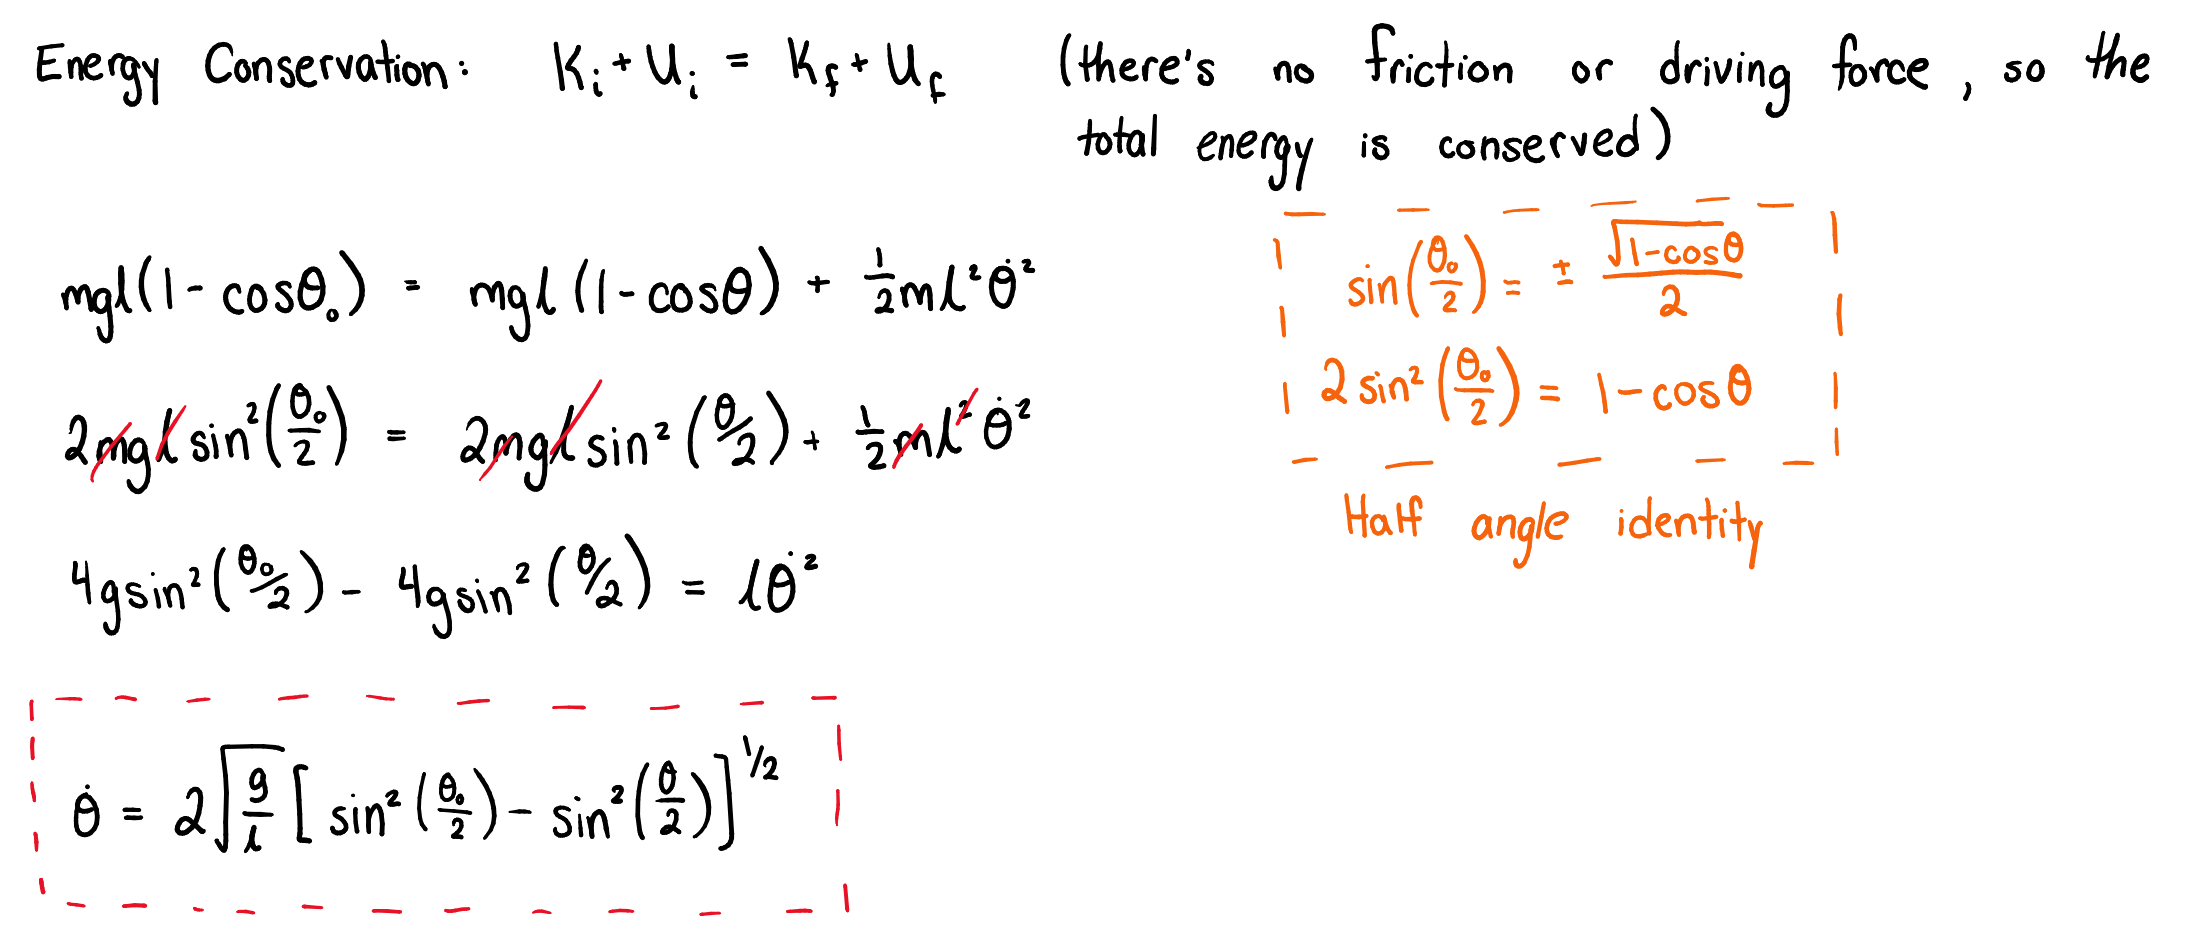

In [7]:
display.Image('images\energy derivation.png')

With this, we can integrate both sides of the expression and find an expression for the period of a pendulum that depends on the initial position.

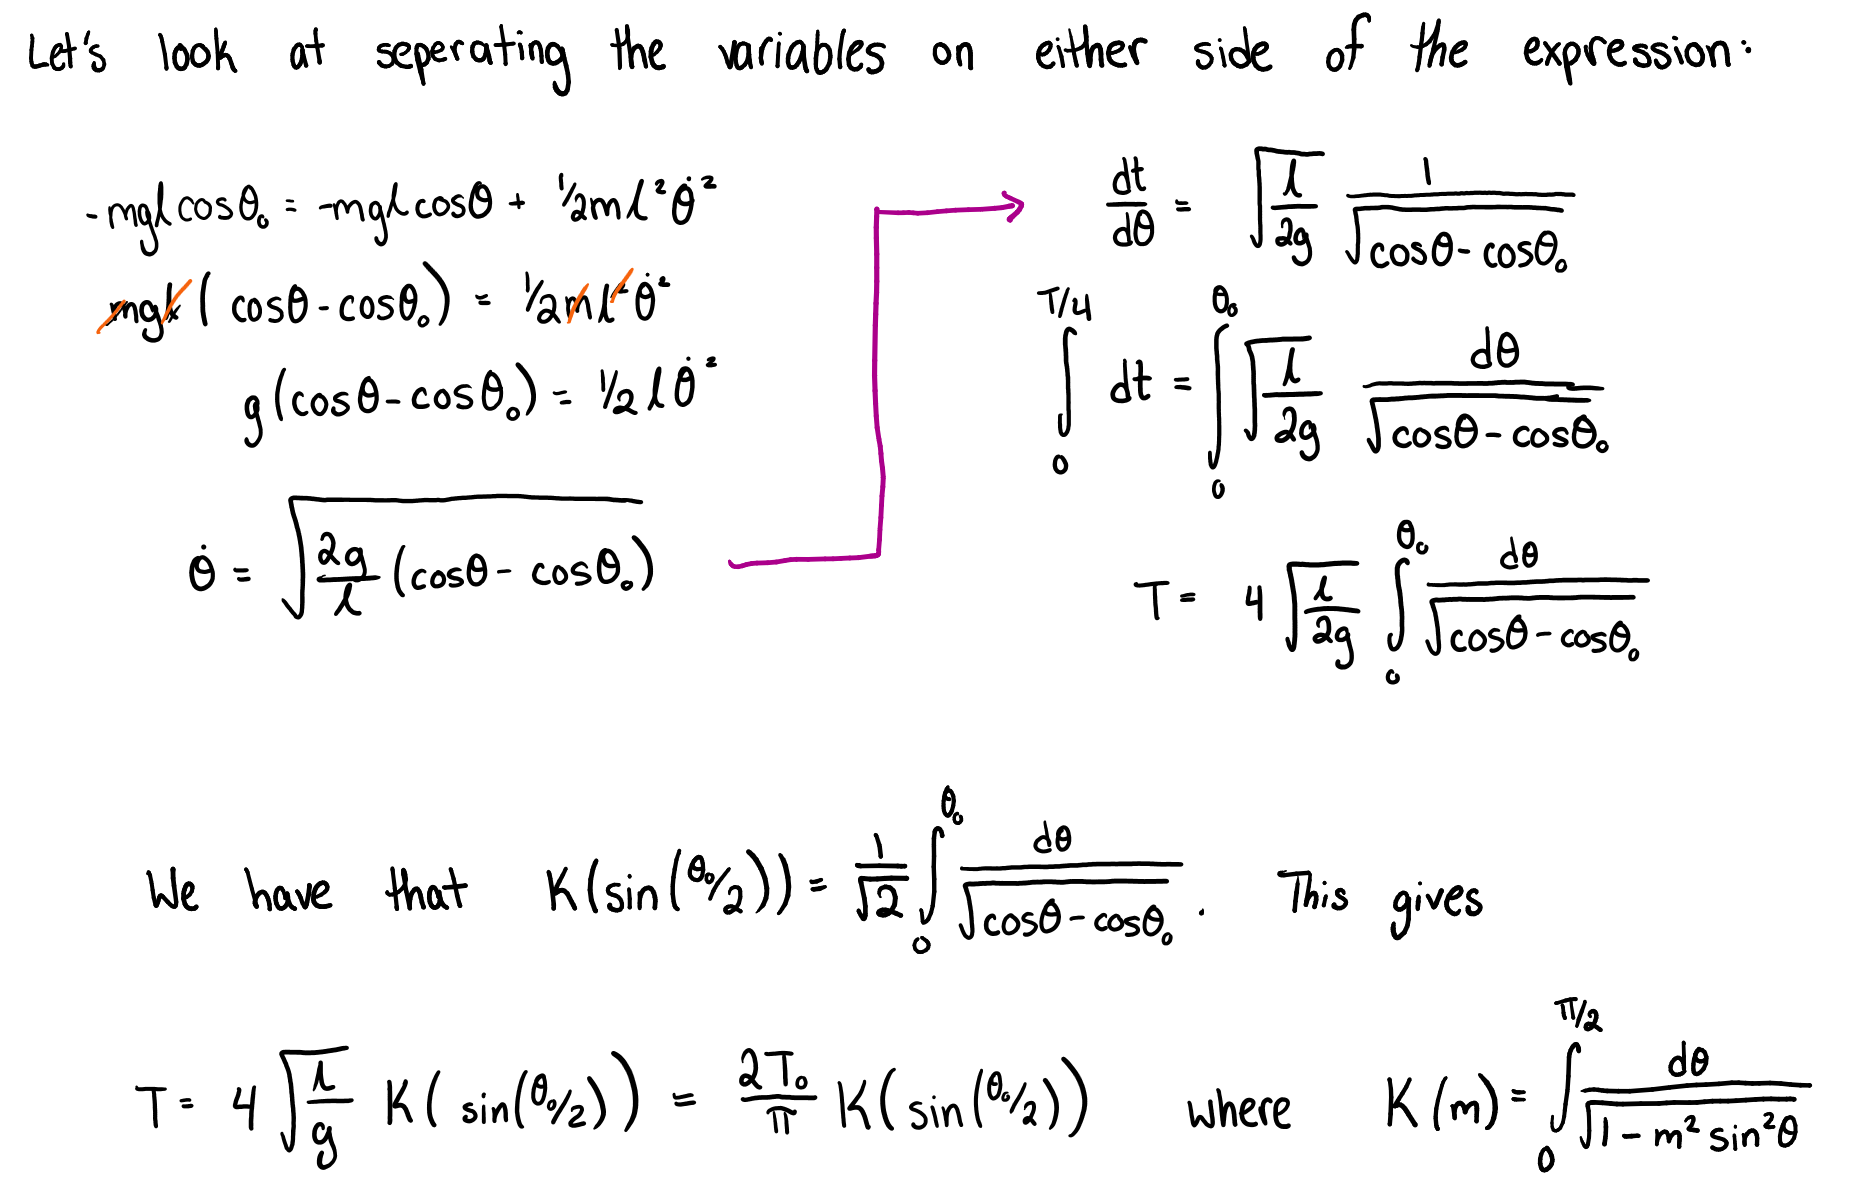

In [8]:
display.Image('images\period_deriv.png')

With this form of the period, Gaussian quadrature can be used to determine the ratio:

\begin{equation*}
    \frac{T}{T_0} = \frac{2}{\pi} K(\sin(\theta_0/2))
\end{equation*}

In [114]:
j = 10
thetas = np.linspace(0, np.pi, j)
ratio = np.zeros(j)

def K(x):
    m = np.sin(theta0/2)
    return 1/np.sqrt(1-(m*m)*(np.sin(x)**2))

a = 0 ; b = np.pi/2 ; n = 12; eps = 3E-16

for i in range(0,len(thetas)):
    theta0 = thetas[i]
    ratio[i] = (2/np.pi)*gaussQuad(K, n, a, b, eps)

print(ratio)

[1.         1.00766903 1.03134052 1.07318201 1.13749256 1.2322292
 1.3728805  1.59444612 2.00751127 4.10491527]


In [77]:
m=np.sin((np.pi/5)/2)
print(m)

def h(x):
    A = (m*m)*(np.sin(x)**2)
    return 1/(np.sqrt(1-A))

a0 = 1.3862944
a1 = 0.1119723
a2 = 0.0725296

b0 = 0.5
b1 = 0.1213478
b2= 0.0288729

m1 = 1-m

As = a0 + a1*m1 + a2*m1*m1
Bs = b0 + b1*m1 + b2*m1*m1

print(As - Bs*np.log(m1))

0.3090169943749474
1.7192049346234097
